<center><h1>Indra Rusyadi Adiwijaya<br/>20921001<br/>
MODUL BAHASA PEMROGRAMAN PYTHON - DATA SCIENCE</h1><br/>SK6091 Independent Research in Computational Science 1<br/>S2 SAINS KOMPUTASI ITB</center>
<hr>

<center><h1>DATA PREPARATION - OUTLIERS</h1></center>
<hr>

Membahas tentang cara mengidentifikasi __outliers__ di dalam dataset, serta cara memfilter dan menghapusnya dari dataset yang akan diproses.

<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 25px">
    <ul>
        <li>
            Definisi Outliers
        </li>
        <li>
            Load dataset
        </li>
        <li>
            Identifikasi Outliers 
            <ul>
                <li>Menemukan outliers dengan visualisasi</li>
                <ul>
                    <li>Box plot</li>
                    <li>Scatter plot</li>
                </ul>
                <li>Menemukan outliers dengan IQR Score</li>
            </ul>
        </li>
        <li>
            Memfilter dan Menghapus outliers
            <ul>
                <li>Memfilter outliers per kolom</li>
                <li>Menghapus outliers per kolom</li>
                <li>Memfilter outliers secara keseluruhan</li>
                <li>Menghapus outliers secara keseluruhan</li>
            </ul>
        </li>
    </ul>
</div>

## Definisi Outliers

Di dalam statistika, __outliers__ merupakan data yang nilainya terlalu jauh dengan data lainnya atau disebut juga dengan pencilan. Keberadaan <i>outliers</i> akan membuat analisis terhadap data tersebut menjadi bias atau dengan kata lain tidak mencerminkan fenomena yang sebenarnya. 

Contoh <i>outliers</i> misalnya nilai mahasiswa dalam satu kelas berkisar antara 60 sampai 100, namun ada satu mahasiswa yang nilainya 5. Nah, nilai 5 ini dianggap sebagai <i>outliers</i> karena tentunya akan mempengaruhi statistik data seperti <i>mean</i> alias nilai rata-rata kelas. Oleh sebab itu, biasanya data yang mengandung <i>outliers</i> akan dihapus.

<img src="../images/outlier-1.png" width="600" align="center">

<hr>

## Load dataset

Dataset yang digunakan adalah dataset <a href='https://archive.ics.uci.edu/ml/datasets/automobile'>Automobile</a> yang berasal dari UCI Machine Learning Repository dengan informasi detail tentang tiap kolom (terurut dari awal sampai akhir) sebagai berikut:

__Attribute Information:__

1. __symboling:__ -3, -2, -1, 0, 1, 2, 3.
2. __normalized-losses:__ continuous from 65 to 256.
3. __make:__
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. __fuel-type:__ diesel, gas.
5. __aspiration:__ std, turbo.
6. __num-of-doors:__ four, two.
7. __body-style:__ hardtop, wagon, sedan, hatchback, convertible.
8. __drive-wheels:__ 4wd, fwd, rwd.
9. __engine-location:__ front, rear.
10. __wheel-base:__ continuous from 86.6 120.9.
11. __length:__ continuous from 141.1 to 208.1.
12. __width:__ continuous from 60.3 to 72.3.
13. __height:__ continuous from 47.8 to 59.8.
14. __curb-weight:__ continuous from 1488 to 4066.
15. __engine-type:__ dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. __num-of-cylinders:__ eight, five, four, six, three, twelve, two.
17. __engine-size:__ continuous from 61 to 326.
18. __fuel-system:__ 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. __bore:__ continuous from 2.54 to 3.94.
20. __stroke:__ continuous from 2.07 to 4.17.
21. __compression-ratio:__ continuous from 7 to 23.
22. __horsepower:__ continuous from 48 to 288.
23. __peak-rpm:__ continuous from 4150 to 6600.
24. __city-mpg:__ continuous from 13 to 49.
25. __highway-mpg:__ continuous from 16 to 54.
26. __price:__ continuous from 5118 to 45400.

Pertama kita <i>import</i> pandas, kemudian <i>load</i> datasetnya ke dataframe.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../datasets/automobile.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Untuk dapat memudahkan analisis data, sebaiknya kita mengubah/menambahkan <i>header</i> yang sesuai untuk menggambarkan masing-masing kolom.

In [2]:
# Membuah list nama kolom
column_names = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
              'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
              'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower',
              'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

# Mengubah nama kolom
df.columns = column_names
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<hr>

## Identifikasi Outliers

Ada beberapa cara yang dapat dilakukan untuk menemukan <i>outliers</i> dalam dataframe, yaitu dengan visualisasi ataupun dengan perhitungan matematika. 

### Menemukan outliers dengan visualisasi

Untuk menemukan <i>outliers</i> dengan metode visualisasi data, kita dapat menggunakan <i>library</i> __Matplotlib__ atau __Seaborn__ yang ada di Python. Di bagian ini, saya akan sedikit membahas visualisasi data seperti __Box plot__ dan __Scatter plot__ sebagai cara untuk menemukan <i>outliers</i>. Pembahasan mengenai visualisasi data secara lebih lengkap dan detail akan disampaikan pada materi khusus <i>Data Visualization</i>.

#### Box plot

Untuk memvisualisasikan data dengan Box plot, kita dapat menggunakan kedua <i>library</i> Python Matplotlib dan Seaborn. Sekarang mari kita buat contoh penggunaan masing-masing <i>library</i> tersebut dalam membuat Box plot.

Untuk membuat Box plot dengan __Matplotlib__, kita harus mengimpornya terlebih dahulu.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

Sekarang kita coba memeriksa apakah ada <i>outliers</i> pada kolom <code>wheel-base</code>.

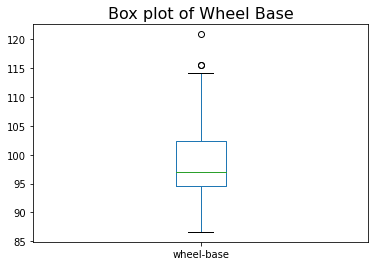

In [4]:
# Memeriksa outliers menggunakan box plot 

df['wheel-base'].plot(kind='box')
plt.title('Box plot of Wheel Base', size=16)
plt.show()

Dari output di atas, kita dapat melihat ada 2 titik di atas yang menandakan <i>outliers</i> pada kolom tersebut. Sekarang mari kita coba periksa kolom numerik lainnya, namun kali ini kita akan menggunakan <i>library</i> visualisasi data lainnya yaitu __Seaborn__.

Sebelumnya kita harus <i>import</i> dahulu <i>library</i> __Seaborn__.

In [5]:
import seaborn as sns

Sekarang kita coba cek apakah ada <i>outliers</i> di kolom <code>engine-size</code>.

Text(0.5, 1.0, 'Box plot of Engine Size')

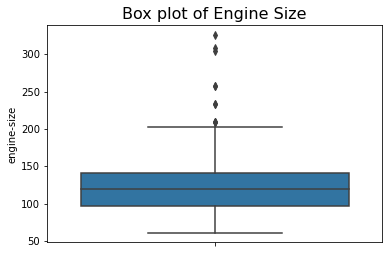

In [6]:
# Memeriksa outliers menggunakan box plot dengan Seaborn

sns.boxplot(y=df['engine-size']).set_title('Box plot of Engine Size', size=16)

Ternyata dari hasil visualisasi di atas, pada kolom <code>engine-size</code> juga ditemukan sejumlah <i>outliers</i>.

Kita juga dapat memeriksa <i>outliers</i> pada kolom tertentu untuk tiap kategori pada kolom lainnya. Misalnya kita akan cek <i>outliers</i> di kolom <code>symboling</code> berdasarkan kolom <code>fuel-type</code>.

Text(0.5, 1.0, 'Group by fuel-type')

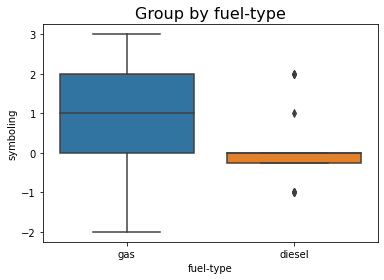

In [7]:
# Membuat boxplot untuk kolom symboling berdasarkan kolom fuel-type

sns.boxplot(y=df['symboling'], x=df['fuel-type']).set_title('Group by fuel-type', size=16)

Seperti yang kita lihat, untuk fule-type __gas__ tidak ada <i>outliers</i> di kolom symboling, sedangkan untuk fuel-type __diesel__ ada beberapa <i>outliers</i>.

#### Scatter plot

Scatter plot adalah jenis visualisasi data yang digunakan untuk melihat relasi antara dua variabel yang direpresentasikan dengan data point (titik). Untuk memeriksa <i>outliers</i> dengan scatter plot, kita dapat melihat apakah ada titik yang berada jauh dari kumpulan titik lainnya. Jika ada kemungkinan itu adalah <i>outliers</i>.

Mari kita cek kolom <code>engine-size</code> dan <code>wheel-base</code> menggunakan visualisasi __Matplotlib__

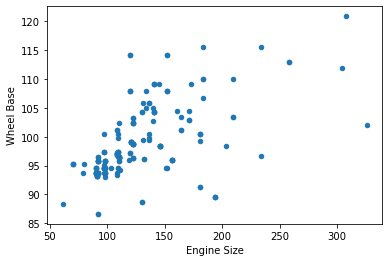

In [8]:
# Memeriksa outliers dengan scatter plot Matplotlib

df.plot(kind='scatter', x='engine-size', y='wheel-base')

plt.xlabel('Engine Size')
plt.ylabel('Wheel Base')
plt.show()

Dari output yang kita lihat, ada beberapa data point yang berada jauh dari kumpulan data point lainnya. Sekarang mari kita coba cek kolom <code>engine-size</code> dan <code>compression-ratio</code> menggunakan visualisasi __Seaborn__.

[Text(0.5, 0, 'Engine Size'), Text(0, 0.5, 'Compression Ratio')]

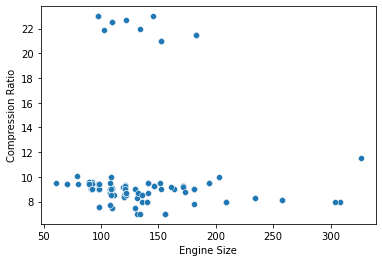

In [9]:
# Memeriksa outliers dengan scatter plot Seaborn

sns.scatterplot(x=df['engine-size'], y=df['compression-ratio']).set(xlabel='Engine Size', ylabel='Compression Ratio')

Dari output di atas dapat kita lihat bahwa, ada sekitar delapan data point yang memiliki compression-ratio jauh lebih tinggi dari rata-rata. Itu dapat dikatakan sebagai <i>outliers</i>

### Menemukan outliers dengan IQR Score

__IQR__ atau <i>Interquartile Range</i> adalah selisih dari kuartil ketiga (persentil 75) dengan kuartil pertama (persentil 25). Jika ditulis dalam formula <code>IQR = Q3 - Q1</code>. IQR dapat digunakan untuk menemukan <i>outliers</i> di dataframe. 

Box plot menggunakan perhitungan IQR untuk menampilkan visualisasi data dan <i>outliers</i>. Namun, kita tidak dapat mengetahui data pada indeks berapa sajakah yang merupakan <i>outliers</i> jika menggunakan box plot. Karena itu, pada bagaian ini kita akan mencoba mengidentifikasi <i>outliers</i> menggunakan perhitungann IQR dan mendapatkan indeks <i>outliers</i> tersebut.

Bagaimana tahapannya?

1. Hitung nilai Q1 dan Q3 
2. Hitung nilai IQR
3. Kalikan IQR dengan 1.5 (konstanta untuk menemukan outliers)
4. Untuk nilai minimum IQR, kurangi Q1 dengan 1.5 x IQR
5. Untuk nilai maximum IQR, tambahkan Q3 dengan 1.5 x IQR
6. Cari nilai minimum dan maksimum dari data
7. Jika nilai minimum data kurang dari nilai minimum IQR, berarti ada low outlier
8. Jika nilai maximum data lebih dari nilai maximum IQR, berarti ada high outlier

Nah, sekarang mari kita buat kode programnya.

Misalnya kita ingin menghitung nilai IQR untuk kolom <code>wheel-base</code>. Untuk mencari nilai Q1 dan Q3, Python memiliki <i>built-in function</i>-nya yaitu <code>quantile()</code>. Kita hanya perlu mendefinisikan parameter berupa bilangan float di dalam tanda kurungnya kuartil berapa yang ingin kita cari. Perhatikan kode berikut.

In [10]:
# Menghitung nilai IQR

Q1 = df['wheel-base'].quantile(0.25)       # mencari kuartil 1 
Q3 = df['wheel-base'].quantile(0.75)       # mencari kuartil 3
IQR = Q3-Q1                                # menghitung IQR

print('Q1 = ', Q1)
print('Q3 = ', Q3)
print('IQR wheel-base = ', IQR)

Q1 =  94.5
Q3 =  102.4
IQR wheel-base =  7.900000000000006


Setelah itu, kita cari nilai maksimum dan minimum dari kolom <code>wheel-base</code>, dan juga nilai minimun IQR dan maksimum IQR. Kemudian kita buat kondisi dimana jika nilai minimum pada kolom <code>wheel-base</code> kurang dari nilai minimum IQR, maka tampilkan tulisan bahwa ada <i>low outliers</i>. Begitu juga untuk nilai maksimum. Jika nilai maksimum pada kolom <code>wheel-base</code> lebih dari nilai maksimum IQR, maka ada <i>high outliers</i>. Jangan lupa tampilkan juga indeks <i>outliers</i> tersebut dengan atribut <code>.index</code>.

In [11]:
# Memeriksa outlier

nilai_min = df['wheel-base'].min()        # mencari nilai minimum 
nilai_max = df['wheel-base'].max()        # mencari nilai maksimum
        
min_IQR = Q1 - 1.5 * IQR                  # menghitung nilai minimum IQR
max_IQR = Q3 + 1.5 * IQR                  # menghitung nilai maksimum IQR
        
# buat kondisi untuk mencari low outlier
if (nilai_min < min_IQR):                        
    print('Low outlier is found <', min_IQR)
    print('Low Outlier Index :', list(df[df['wheel-base'] < min_IQR].index))     # menampilkan indeks low outlier
    
# buat kondisi untuk mencari high outlier
if (nilai_max > max_IQR):
    print('High outlier is found >', max_IQR)
    print('High outlier Index : ', list(df[df['wheel-base'] > max_IQR].index))   # menampilkan indeks high outlier 

High outlier is found > 114.25000000000001
High outlier Index :  [70, 71, 73]


Sampai di sini kita telah menemukan <i>outliers</i> pada kolom <code>wheel-base</code> yaitu ada pada indeks <code>70</code>, <code>71</code> dan <code>73</code>.

Selanjutnya bagaimana caranya agar kita dapat langsung mengetahui keberadaan <i>outliers</i> pada seluruh kolom numerik di dataframe? Kita dapat memasukkan kode program di atas ke dalam perulangan sehingga tidak perlu melakukan cara tersebut berulang kali untuk tiap kolomnya. Perhatikan kode berikut.

In [12]:
# Menghitung IQR dan memeriksa outlier untuk semua kolom bertipe int64 dan float64

for i in (df.columns):                               # membuat perulangan untuk tiap kolom di dalam dataframe
    if (df[i].dtypes in ['int64','float64']):        # membuat kondisi untuk memilih kolom bertipe int64 dan float 64
        print(i,':',df[i].dtypes)                    # mencetak nama kolom dan tipe datanya
        
        Q1 = df[i].quantile(0.25)
        print('Q1', Q1)
        
        Q3 = df[i].quantile(0.75)
        print('Q3', Q3)
        
        IQR = Q3-Q1
        print('IQR', IQR)
        
        nilai_min = df[i].min()
        nilai_max = df[i].max()
        
        min_IQR = Q1 - 1.5 * IQR
        max_IQR = Q3 + 1.5 * IQR
        
        # Mencari outlier 
        if (nilai_min < min_IQR):
            print('Low outlier is found <', min_IQR)
            print('Low Outlier Index :', list(df[df[i] < min_IQR].index))
        if (nilai_max > max_IQR):
            print('High outlier is found >', max_IQR)
            print('High outlier Index : ', list(df[df[i] > max_IQR].index))

        print('\n')

symboling : int64
Q1 0.0
Q3 2.0
IQR 2.0


wheel-base : float64
Q1 94.5
Q3 102.4
IQR 7.900000000000006
High outlier is found > 114.25000000000001
High outlier Index :  [70, 71, 73]


length : float64
Q1 166.3
Q3 183.1
IQR 16.799999999999983
Low outlier is found < 141.10000000000002
Low Outlier Index : [18]


width : float64
Q1 64.1
Q3 66.9
IQR 2.8000000000000114
High outlier is found > 71.10000000000002
High outlier Index :  [6, 7, 8, 70, 71, 73, 74, 129]


height : float64
Q1 52.0
Q3 55.5
IQR 3.5


curb-weight : int64
Q1 2145.0
Q3 2935.0
IQR 790.0


engine-size : int64
Q1 97.0
Q3 141.0
IQR 44.0
High outlier is found > 207.0
High outlier Index :  [15, 16, 17, 47, 48, 49, 71, 72, 73, 74]


compression-ratio : float64
Q1 8.6
Q3 9.4
IQR 0.8000000000000007
Low outlier is found < 7.399999999999999
Low Outlier Index : [9, 29, 82, 83, 84, 117, 124]
High outlier is found > 10.600000000000001
High outlier Index :  [49, 63, 66, 67, 68, 69, 70, 90, 108, 110, 112, 114, 116, 158, 159, 174, 182, 184,

Kode di atas persis sama dengan kode sebelumnya, hanya saja kita memasukkannya ke dalam <i>for looping</i> dan juga membuat kondisi untuk memilih kolom yang bertipe numerik seperti __int64__ atau __float64__.

<hr>

## Memfilter dan menghapus outliers

Untuk menangani <i>outliers</i> kita dapat memfilternya untuk melihat data pada kolom lainnya ataukah langsung menghapusnya. Di sini kita akan membahas cara memfilter dan menghapus baris data baik per kolom ataupun langsung secara keseluruhan.

### Memfilter outliers per kolom

Setelah kita mengetahui dari output kode program sebelumnya bahwa kolom <code>wheel-base</code> mengandung <i>outliers</i> pada data indeks 70, 71, dan 73, kita dapat langsung memfilternya untuk melihat datanya menggunaakn <code>.iloc</code> seperti di bawah ini.

In [13]:
# Menampilkan data yang mengandung outliers pada kolom wheel-base

df.iloc[[70,71,73], :]        # memasukkan indeks 70,71,73 (outliers) secara langsung

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
70,-1,93,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,...,183,idi,3.58,3.64,21.5,123,4350,22,25,31600
71,-1,?,mercedes-benz,gas,std,four,sedan,rwd,front,115.6,...,234,mpfi,3.46,3.10,8.3,155,4750,16,18,34184
73,0,?,mercedes-benz,gas,std,four,sedan,rwd,front,120.9,...,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960


### Menghapus outliers per kolom

Kita juga dapat menghapus baris 70, 71, dan 73 tersebut dengan <code>drop()</code> dengan memberikan parameter <code>axis = 0</code> yang menandakan bahwa kita ingin menghapus baris, bukan kolom.

In [14]:
# Menghapus baris yang mengandung outliers pada kolom wheel-base

df.drop([70, 71, 73], axis=0)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


### Memfilter outliers secara keseluruhan

Untuk memfilter ataupun menghapus baris data yang mengandung <i>outliers</i> secara keseluruhan, kita perlu sedikit menambahkan beberapa baris kode program dari kode sebelumnya. Perhatikan kode di bawah ini.

In [15]:
from itertools import chain     # import chain yang berfungsi untuk membuat flat list, contoh:[[1,2,3][3,4]] menjadi [1,2,3,3,4] 

outlier_index =[]               # mendefinisikan list kosong untuk menyimpan indeks outliers

for i in (df.columns):                               # membuat perulangan untuk tiap kolom di dalam dataframe
    if (df[i].dtypes in ['int64','float64']):        # membuat kondisi untuk memilih kolom bertipe int64 dan float 64
        print(i,':',df[i].dtypes)                    # mencetak nama kolom dan tipe datanya
        
        Q1 = df[i].quantile(0.25)
        print('Q1', Q1)
        
        Q3 = df[i].quantile(0.75)
        print('Q3', Q3)
        
        IQR = Q3-Q1
        print('IQR', IQR)
        
        nilai_min = df[i].min()
        nilai_max = df[i].max()
        
        min_IQR = Q1 - 1.5 * IQR
        max_IQR = Q3 + 1.5 * IQR
        
        # Mencari outlier 
        if (nilai_min < min_IQR):
            print('Low outlier is found <', min_IQR)
            print('Low Outlier Index :', list(df[df[i] < min_IQR].index))
            outlier_index.append(list(df[df[i] < min_IQR].index))           # memasukkan indeks outliers ke variabel outlier_index
            
        if (nilai_max > max_IQR):
            print('High outlier is found >', max_IQR)
            print('High outlier Index : ', list(df[df[i] > max_IQR].index))
            outlier_index.append(list(df[df[i] > max_IQR].index))           # memasukkan indeks outliers ke variabel outlier_index
        
        print('\n')
        
# mengaplikasikan chain, serta mengambil nilai uniknya saja, lalu memasukkan lagi ke dalam list baru unique_out_ind
unique_out_ind = list(set(list(chain(*outlier_index))))         

print(unique_out_ind)            # Mencetak list indeks outlier unik

symboling : int64
Q1 0.0
Q3 2.0
IQR 2.0


wheel-base : float64
Q1 94.5
Q3 102.4
IQR 7.900000000000006
High outlier is found > 114.25000000000001
High outlier Index :  [70, 71, 73]


length : float64
Q1 166.3
Q3 183.1
IQR 16.799999999999983
Low outlier is found < 141.10000000000002
Low Outlier Index : [18]


width : float64
Q1 64.1
Q3 66.9
IQR 2.8000000000000114
High outlier is found > 71.10000000000002
High outlier Index :  [6, 7, 8, 70, 71, 73, 74, 129]


height : float64
Q1 52.0
Q3 55.5
IQR 3.5


curb-weight : int64
Q1 2145.0
Q3 2935.0
IQR 790.0


engine-size : int64
Q1 97.0
Q3 141.0
IQR 44.0
High outlier is found > 207.0
High outlier Index :  [15, 16, 17, 47, 48, 49, 71, 72, 73, 74]


compression-ratio : float64
Q1 8.6
Q3 9.4
IQR 0.8000000000000007
Low outlier is found < 7.399999999999999
Low Outlier Index : [9, 29, 82, 83, 84, 117, 124]
High outlier is found > 10.600000000000001
High outlier Index :  [49, 63, 66, 67, 68, 69, 70, 90, 108, 110, 112, 114, 116, 158, 159, 174, 182, 184,

Sekarang mari kita cetak list indeks <i>outliers</i> tersebut secara terurut.

In [16]:
# Mencetak indeks data yang mengandung outliers secara terurut

print(sorted(unique_out_ind))

[6, 7, 8, 9, 15, 16, 17, 18, 29, 30, 47, 48, 49, 63, 66, 67, 68, 69, 70, 71, 72, 73, 74, 82, 83, 84, 90, 108, 110, 112, 114, 116, 117, 124, 129, 158, 159, 174, 182, 184, 187, 192, 203]


Kita dapat menggunakan list indeks tersebut untuk memfilter atau melihat seluruh baris data yang mengandung <i>outliers</i> tersebut untuk kemudian diputuskan akan menghapus seluruhnya atau membiarkannya.

In [17]:
# Menampilkan seluruh baris data yang mengandung outliers

df.iloc[sorted(unique_out_ind), :]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
15,0,?,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760
16,0,?,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
17,0,?,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880
18,2,121,chevrolet,gas,std,two,hatchback,fwd,front,88.4,...,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151
29,3,145,dodge,gas,turbo,two,hatchback,fwd,front,95.9,...,156,mfi,3.60,3.90,7.0,145,5000,19,24,12964
30,2,137,honda,gas,std,two,hatchback,fwd,front,86.6,...,92,1bbl,2.91,3.41,9.6,58,4800,49,54,6479


### Menghapus outliers secara keseluruhan

Setelah di atas kita mendapatkan list indeks <i>outliers</i>, kita juga dapat menggunakannya untuk langsung menghapus keseluruhan baris data tersebut.

In [18]:
# Menghapus seluruh baris yang mengandung outliers 

df.drop(sorted(unique_out_ind), axis=0).head(8)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430
11,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16925


Jika Anda ingin menyimpan dataframe yang sudah dihapus <i>outliers</i>-nya, Anda dapat memasukkannya ke dalam variabel baru lalu mereset indeksnya seperti di bawah ini.

In [19]:
# menghapus outliers dan mereset indeksnya
df_without_outlier = df.drop(sorted(unique_out_ind), axis=0)

# mereset indeks dataframe setelah menghapus outliers
df_without_outlier.reset_index(drop=True, inplace=True)
df_without_outlier.head(8)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430
7,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16925


<hr>

Referensi : <br/>
@ilmudatapy <br/>
UCI Machine Learning Repository